<img src="./img/logo_UTN.svg" align="right" width="200" /> 

### Teoría de los Circuitos 2

# Trabajo semanal 10
### Tomas A. Albanesi


## Indice de contenidos:
* [1. Consignas](#1)
* [2. Inicializaciones de código](#2)
* [3. Resolución Punto 1)](#3)
    * [3.1. Resolución analitica](#3.1)
    * [3.2. Resolución simbolica](#3.2)
* [4. Resolución Punto 2)](#4)
    * [4.1. Resolución analitica](#4.1)
    * [4.2. Resolución simbolica](#4.2)
* [5. Conclusiones generales](#5)

## 1. Consigna <a class="anchor" id="1"></a>

<img src="./img/ConsignaPunto1.png" width="700" />
<img src="./img/ConsignaPunto2.png" width="700" />

## 2. Inicializaciones de código <a class="anchor" id="2"></a>

In [30]:
# Importacion de librerias a utilizar en todo el notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy as sp
from IPython.display import IFrame
from pytc2.sintesis_dipolo import foster, cauer_LC
from pytc2.dibujar import dibujar_foster_serie, dibujar_foster_derivacion, dibujar_cauer_LC
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_espacio_derivacion, Resistor,dibujar_tanque_RC_derivacion, Capacitor, Inductor, dibujar_elemento_derivacion
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from pytc2.remociones import remover_valor_en_dc, remover_valor_en_infinito, remover_polo_sigma, remover_valor, remover_polo_infinito

# Inicializacion de gráficos
plt.figure(1)
plt.close(1)

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

## 3. Resolución Punto 1) <a class="anchor" id="3"></a>

### 3.1. Resolución analitica <a class="anchor" id="3.1"></a>

In [7]:
# Visualizacion de PDF
IFrame("./docs/TC2_Albanesi_TS10_ResolucionAnaliticaPunto1.pdf", width=1000, height=1000)

### 3.2. Resolución simbolica <a class="anchor" id="3.2"></a>

In [8]:
# Resolución simbólica
s = sp.symbols('s', complex=True)

# Sea la siguiente función de excitación
ZZ = (s**2 + 6*s + 8)/(s**2 + 4*s + 3)
print_latex(a_equal_b_latex_s('Z(s)', ZZ))

<IPython.core.display.Math object>

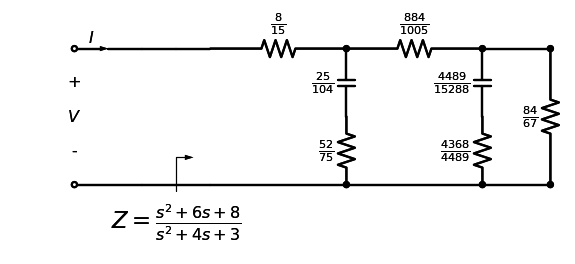

In [19]:
# remoción parcial para que el siguiente tanque R1-C1 resuenen a 6 r/s

# Consignas del ejercicio: resonancias de dos tanques RC
sigma1 = 6
sigma2 = sp.Rational('7/2')

# La topología circuital guía las remociones:
    
Z2, Ra = remover_valor(ZZ, sigma_zero = sigma1)

Y4, Y3, R1, C1 = remover_polo_sigma(1/Z2, sigma1, isImpedance = False)

Z6, Rb = remover_valor(1/Y4, sigma_zero = sigma2)

Y8, k2, R2, C2 = remover_polo_sigma(1/Z6, sigma2, isImpedance = False)

Rc = 1/Y8

# Dibujamos la red resultante:

d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                                          'Z',  
                                          ZZ, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Resistor, Ra)

d = dibujar_tanque_RC_derivacion(d, R1, C1)
    
d = dibujar_elemento_serie(d, Resistor, Rb)

d = dibujar_tanque_RC_derivacion(d, R2, C2)
                        
d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, Resistor, Rc)

display(d)

## 4. Resolución Punto 2) <a class="anchor" id="4"></a>

### 4.1. Resolución analítica <a class="anchor" id="4.1"></a>

In [20]:
# Visualizacion de PDF
IFrame("./docs/TC2_Albanesi_TS10_ResolucionAnaliticaPunto2.pdf", width=1000, height=1000)

### 4.2. Resolución simbolica <a class="anchor" id="4.2"></a>

In [22]:
# Resolución simbólica
s = sp.symbols('s', complex=True)

# Sea la siguiente función de excitación
ZZ = (s**2+s+1)/(s**2+2*s+5)/(s+1)
print_latex(a_equal_b_latex_s('Z(s)', ZZ))

<IPython.core.display.Math object>

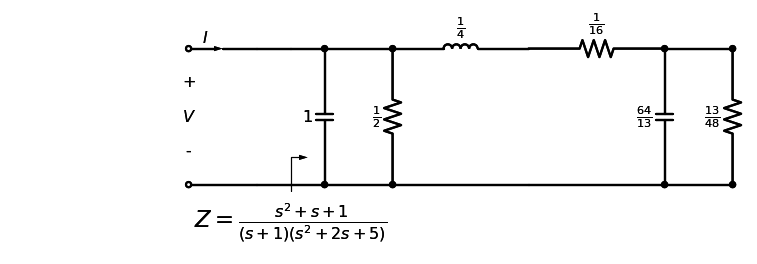

In [31]:
# remoción total en infinito de 1/ZZ

Y2, Yc1 = remover_polo_infinito(1/ZZ)

# Yc1 es la admitancia removida
# extraigo C1
C1 = Yc1/s

Ginf = sp.limit(Y2, s, sp.oo)
G0 = sp.limit(Y2, s, 0)

# remuevo la menor admitancia
R1 = 1/np.min((Ginf, G0))
Y4 = sp.factor(sp.simplify(sp.expand(Y2 - 1/R1)))

Z6, Zl1 = remover_polo_infinito(1/Y4)

# Zl1  es la impedancia removida
# extraigo L1
L1 = Zl1/s

# remuevo la menor resistencia
Rinf = sp.limit(Z6, s, sp.oo)
R0 = sp.limit(Z6, s, 0)
R2 = np.min((Rinf, R0))
Z8 = sp.factor(sp.simplify(sp.expand(Z6 - R2)))

# extraigo C2
C2 = sp.limit(1/s/Z8, s, sp.oo)

Y10, Yc2 = remover_polo_infinito(1/Z8)
# Yc1 es la admitancia removida
# extraigo C1
C2 = Yc2/s

R3 = 1/Y10



# Dibujamos la red resultante:

d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                                          'Z',  
                                          ZZ, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = dibujar_elemento_derivacion(d, Capacitor, C1)

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, Resistor, R1)
    
d = dibujar_elemento_serie(d, Inductor, L1)

d = dibujar_elemento_serie(d, Resistor, R2)

d = dibujar_elemento_derivacion(d, Capacitor, C2)

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, Resistor, R3)

display(d)

## Conclusiones generales <a class="anchor" id="5"></a>

Como conclusiones generales sobre esta tarea semanal, pude comprender los conceptos de sintesis de redes disipativas, asi como aplicar las herramientes ya aprendidas en funciones de excitacion no disipativas. 
Estoy comenzando a ver el potencial que tiene Python para aplicar exclusivamente a la electronica, como el dibujo y sintesis de redes, en unas pocas lineas de codigo.